 Dataset link('https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

 Dataset link('https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')

In [3]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    

In [5]:
data_dir = 'Train'


IMG_HEIGHT = 40
IMG_WIDTH = 40

channels = 3

In [6]:
NUM_CATEGORIES = len(os.listdir(data_dir))
NUM_CATEGORIES

43

In [7]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

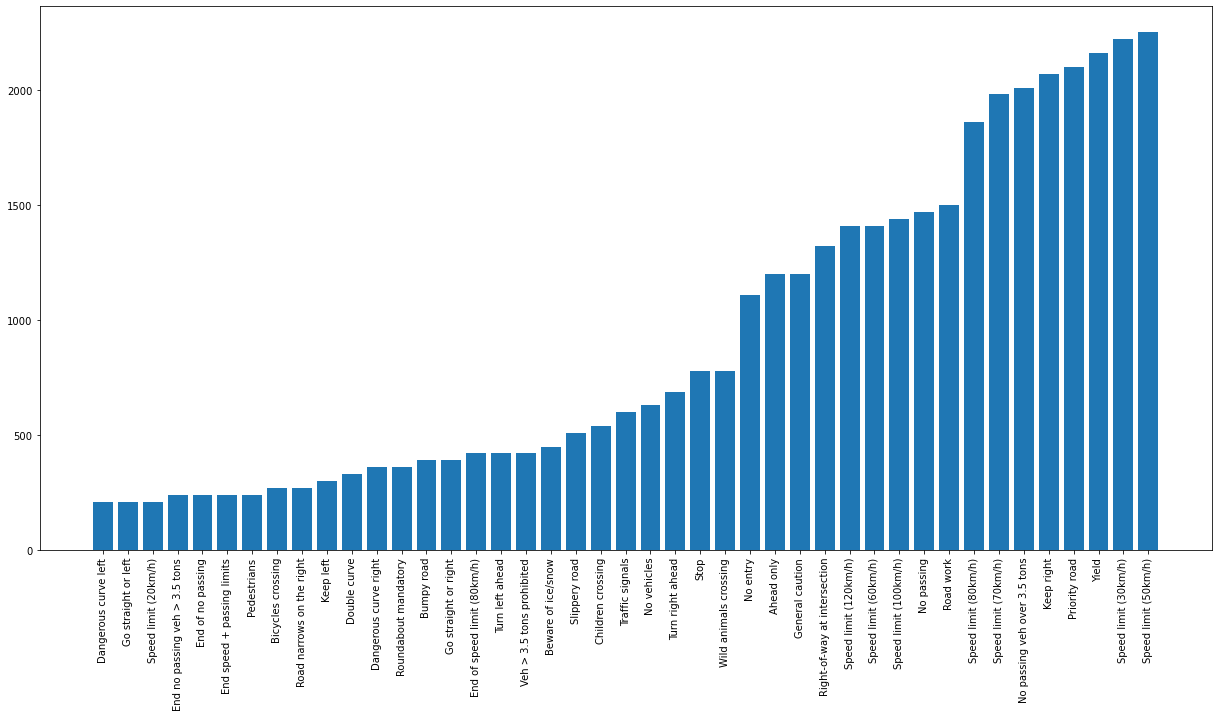

In [8]:
folders = os.listdir(data_dir)

data_number = []
class_num = []

for folder in folders:
    data_files = os.listdir(data_dir + '/' + folder)
    data_number.append(len(data_files))
    class_num.append(classes[int(folder)])
    

zipped_lists = zip(data_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
data_number, class_num = [ list(tuple) for tuple in  tuples]


plt.figure(figsize=(21,10))  
plt.bar(class_num, data_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [9]:
 for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(240, 30, 30, 3) (240,)


In [10]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(192, 30, 30, 3) (48, 30, 30, 3) (192,) (48,)


In [44]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [24]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h4")


Epoch 1/15
981/981 [==============================] - 254s 258ms/step - loss: 1.7580 - accuracy: 0.5598 - val_loss: 0.3067 - val_accuracy: 0.9264
Epoch 2/15
981/981 [==============================] - 235s 239ms/step - loss: 0.4660 - accuracy: 0.8720 - val_loss: 0.1034 - val_accuracy: 0.9753
Epoch 3/15
981/981 [==============================] - 217s 222ms/step - loss: 0.3131 - accuracy: 0.9155 - val_loss: 0.0859 - val_accuracy: 0.9804
Epoch 4/15
981/981 [==============================] - 213s 217ms/step - loss: 0.2788 - accuracy: 0.9239 - val_loss: 0.1078 - val_accuracy: 0.9751
Epoch 5/15
981/981 [==============================] - 213s 217ms/step - loss: 0.2384 - accuracy: 0.9378 - val_loss: 0.0521 - val_accuracy: 0.9869
Epoch 6/15
981/981 [==============================] - 212s 216ms/step - loss: 0.2070 - accuracy: 0.9460 - val_loss: 0.1407 - val_accuracy: 0.9626
Epoch 7/15
981/981 [==============================] - 211s 215ms/step - loss: 0.2216 - accuracy: 0.9419 - val_loss: 0.0784 -

INFO:tensorflow:Assets written to: my_model.h4\assets


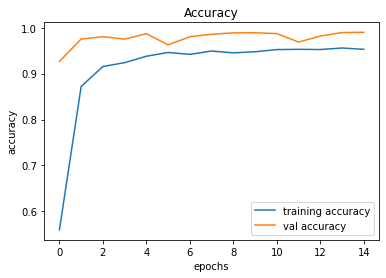

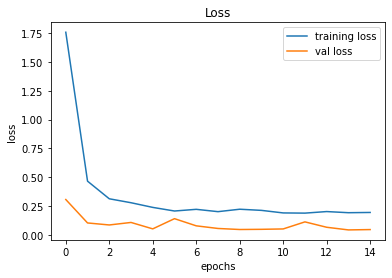

In [25]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [46]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[2 2 2 ... 2 2 2]


In [28]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, np.argmax(predict_x,axis=1)))

0.9697545526524148


In [29]:
model.save("traffic_classifier.h5")

INFO:tensorflow:Assets written to: my_model.h4\assets


INFO:tensorflow:Assets written to: my_model.h4\assets
